1️⃣ Steps to Compress an Image Using SVD

Convert the image into a grayscale matrix.

Apply SVD decomposition.

Keep only the top K singular values to reduce the image size.

Reconstruct the image using the reduced singular values.

Compare the original vs. compressed image.

In [35]:
import numpy as np

import matplotlib.pyplot as plt

import cv2

In [36]:
# Load the image in grayscale

image_path = "/Users/Dataghost/Master-X-DL/claude.jpg"  # Replace with your image path

# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image = cv2.imread(image_path, cv2.rgb)

In [37]:
# Convert image to float32 for numerical stability

image = np.array(image, dtype=np.float32)

In [38]:
# Perform SVD

U, S, Vt = np.linalg.svd(image, full_matrices=False)

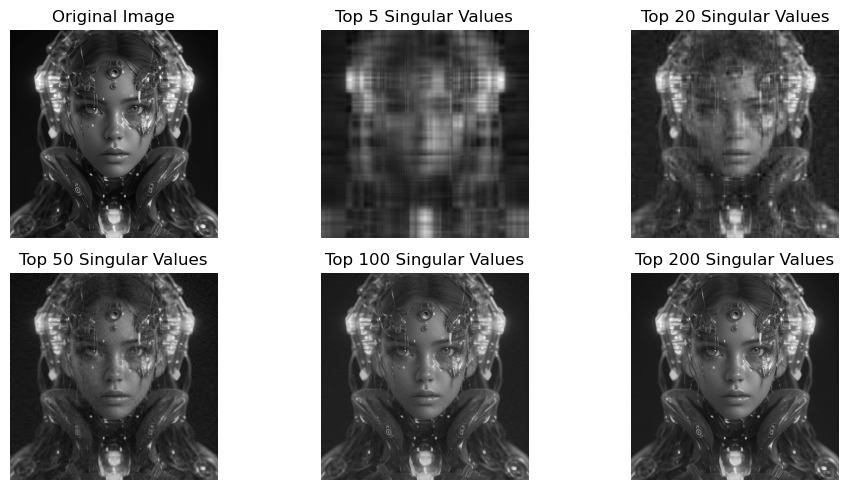

In [39]:
# Function to reconstruct image using top K singular values

def reconstruct_image(U, S, Vt, k):

    S_k = np.zeros((k,k))

    np.fill_diagonal(S_k, S[:k])

    U_k = U[:, :k]

    Vt_k = Vt[:k, :]


    return np.dot(U_k, np.dot(S_k, Vt_k))


# Set different compression levels

k_values = [5, 20, 50, 100, 200] # Keep different numbers of singular values


# Plot original and compressed images

plt.figure(figsize=(10,5))

# Show Original Image

plt.subplot(2,3,1)

plt.imshow(image, cmap='gray')

plt.title('Original Image')

plt.axis('off')


# Show Compressed Images

for i, k in enumerate(k_values):

    compressed_image = reconstruct_image(U, S, Vt, k)

    plt.subplot( 2, 3, i+2)

    plt.imshow(compressed_image, cmap='gray')

    plt.title(f'Top {k} Singular Values')

    plt.axis('off')

plt.tight_layout()

plt.show()



Key Insights

Larger K → Higher Quality, Larger Storage

A large k keeps more details but increases file size.

Smaller K → More Compression, More Data Loss

A small k reduces storage but loses fine details.

Real-world Applications

JPEG Compression: SVD helps in reducing storage space.

Feature Extraction: Keeping only the most important singular values captures key patterns in images.

1. Higher k values gives more clarity, I tried 250 and 300 , 250 gives more clarity 300 raises a value error like it only takes less than I value I think.

2.